In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

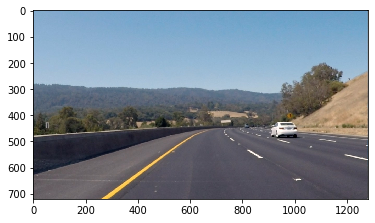

In [44]:
image = cv2.imread('images/curved_lane.jpg').copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Convert to grayscale

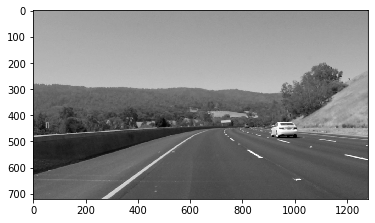

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Create custom kernel

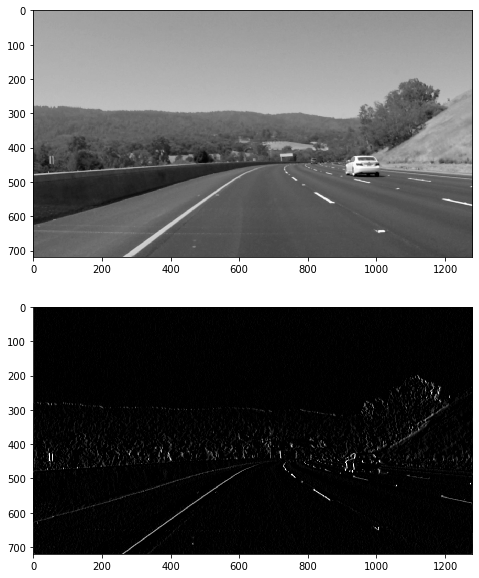

In [46]:
# Sobel filter - detects intensity changes in x or y direction
# 3x3 array for edge detection
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

gaussian_blur = np.array([[1/16, 2/16, 1/16],
                          [2/16, 4/16, 2/16],
                          [1/16, 2/16, 1/16]])

# Perform convolution with inputs (image, bit-depth, kernel)
# -1 means output will have the same as input
blurred = cv2.filter2D(gray, -1, gaussian_blur)
filtered = cv2.filter2D(blurred, -1, sobel_x)

# Show the edge detection
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.imshow(blurred, cmap='gray')
ax2.imshow(filtered, cmap='gray')

### Create binary image

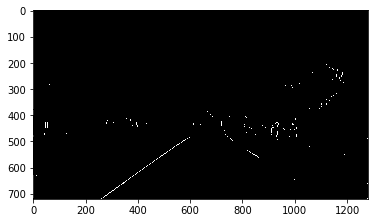

In [47]:
# Sets all pixel values above 100 to 255, using a binary threshold
retval, binary_img = cv2.threshold(filtered, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_img, cmap='gray')
